In [164]:
# %load '~/hw-private/hw5_multi_soln/plot.py'
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os

"""
Using the plotter:

Call it from the command line, and supply it with logdirs to experiments.
Suppose you ran an experiment with name 'test', and you ran 'test' for 10 
random seeds. The runner code stored it in the directory structure

    data
    L test_EnvName_DateTime
      L  0
        L log.txt
        L params.json
      L  1
        L log.txt
        L params.json
       .
       .
       .
      L  9
        L log.txt
        L params.json

To plot learning curves from the experiment, averaged over all random
seeds, call

    python plot.py data/test_EnvName_DateTime --value AverageReturn

and voila. To see a different statistics, change what you put in for
the keyword --value. You can also enter /multiple/ values, and it will 
make all of them in order.


Suppose you ran two experiments: 'test1' and 'test2'. In 'test2' you tried
a different set of hyperparameters from 'test1', and now you would like 
to compare them -- see their learning curves side-by-side. Just call

    python plot.py data/test1 data/test2

and it will plot them both! They will be given titles in the legend according
to their exp_name parameters. If you want to use custom legend titles, use
the --legend flag and then provide a title for each logdir.

"""

def plot_data(data, value="AverageReturn"):
    if isinstance(data, list):
        data = pd.concat(data, ignore_index=True)

    sns.set(style="darkgrid", font_scale=1.5)
    #plt.axis([0, 60, -200, -50])
    ax = sns.tsplot(data=data, time="Iteration", value=value, unit="Unit", condition="Condition")
    ax.set_ylim(-200, -50)
    ax.set_xlim(0, 60)
    plt.legend(loc='upper left').draggable()
    plt.show()


def get_datasets(fpath, condition=None):
    unit = 0
    datasets = []
    print(fpath)
    for root, dir, files in os.walk(fpath):
        if 'log.txt' in files:
            param_path = open(os.path.join(root,'params.json'))
            params = json.load(param_path)
            exp_name = params['exp_name']
            
            log_path = os.path.join(root,'log.txt')
            experiment_data = pd.read_table(log_path)

            experiment_data.insert(
                len(experiment_data.columns),
                'Unit',
                unit
                )        
            experiment_data.insert(
                len(experiment_data.columns),
                'Condition',
                condition or exp_name
                )

            datasets.append(experiment_data)
            unit += 1

    return datasets

def plot(logdir, legend, value):
    use_legend = False
    if legend is not None:
        assert len(legend) == len(logdir), \
            "Must give a legend title for each set of experiments."
        use_legend = True

    data = []
    if use_legend:
        for logdir, legend_title in zip(logdir, legend):
            data += get_datasets(logdir, legend_title)
    else:
        for logdir in logdir:
            data += get_datasets(logdir)

    if isinstance(value, list):
        values = value
    else:
        values = [value]
    for value in values:
        plot_data(data, value=value)



['/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-rnn-randtask-hist4-square_pm_31-10-2018_21-01-39', '/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-fc-randtask-hist1-square_pm_31-10-2018_20-59-30', '/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-fc-randtask-hist4-square_pm_31-10-2018_21-00-33', '/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-rnn-randtask-hist20-square_pm_31-10-2018_21-48-52', '/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-rnn-randtask-hist1-square_pm_31-10-2018_21-38-33']
/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-rnn-randtask-hist4-square_pm_31-10-2018_21-01-39
/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-fc-randtask-hist1-square_pm_31-10-2018_20-59-30
/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-fc-randtask-hist4-square_pm_31-10-2018_21-00-33
/home/rakelly/hw-private/hw5_multi_soln/data/FINAL-pm-ppo-rnn-randtask-hist20-square_pm_31-10-2018_21-48-52
/home/rakelly/hw-privat

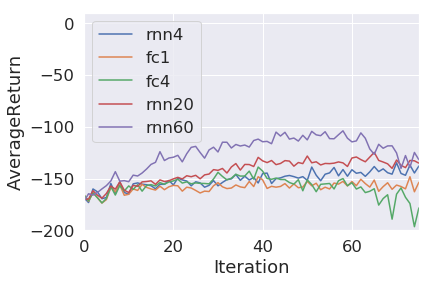

In [129]:
prefix = '/home/rakelly/hw-private/hw5_multi_soln/data/'
logdir = ['{}FINAL-pm-ppo-fcll-randtask_pm_30-10-2018_17-24-02', # fc last ob
          '{}FINAL-pm-ppo-rnn-randtask_pm_30-10-2018_10-38-56', # rnn high lr
          '{}FINAL-pm-ppo-rnn-randtask_pm_30-10-2018_17-47-25', # rnn low lr
          #'{}FINAL-pm-ppo-rnn-randtask-largenn_pm_30-10-2018_20-36-54', # rnn with same #layers as MLP
          #'{}FINAL-pm-ppo-rnn-randtask-long_pm_30-10-2018_20-32-57', # rnn with longer trials
          #'{}FINAL-pm-ppo-rnn-randtask-hist20_pm_30-10-2018_21-56-43', # rnn with hist 20
          #'{}FINAL-pm-ppo-rnn-randtask-hist4_pm_30-10-2018_21-56-59', # rnn with hist 4
          #'{}FINAL-pm-ppo-rnn-randtask-hist4-L1_pm_30-10-2018_22-58-50' # rnn with hist 4 with huber loss reward
         ]
#logdir = ['{}FINAL-pm-ppo-fc-randtask-hist1_pm_31-10-2018_19-03-02', # fc hist 1
          #'{}FINAL-pm-ppo-fc-randtask-hist4_pm_31-10-2018_19-02-46', # fc hist 4
          #'{}FINAL-pm-ppo-rnn-randtask_pm_31-10-2018_20-32-20' # rnn hist 4
         #]
# square of goals
logdir = ['{}FINAL-pm-ppo-rnn-randtask-hist4-square_pm_31-10-2018_21-01-39', # rnn hist 4
          '{}FINAL-pm-ppo-fc-randtask-hist1-square_pm_31-10-2018_20-59-30', # fc hist 1
          '{}FINAL-pm-ppo-fc-randtask-hist4-square_pm_31-10-2018_21-00-33', # fc hist 4
          '{}FINAL-pm-ppo-rnn-randtask-hist20-square_pm_31-10-2018_21-48-52', # rnn hist 20
          '{}FINAL-pm-ppo-rnn-randtask-hist1-square_pm_31-10-2018_21-38-33', # rnn hist 60
          #'{}FINAL-pm-ppo-fc-randtask-hist60-square_pm_31-10-2018_22-24-11'
         ]
#logdir = logdir[-1:]
logdir = [l.format(prefix) for l in logdir]
print(logdir)
#stat = 'FinalReward'
stat = 'AverageReturn'
#plot(logdir, ['fc low lr', 'rnn high lr', 'rnn low lr', 'rnn largenn', 'rnn long', 'rnn 20', 'rnn 4'], stat)
#plot(logdir, ['fc1', 'rnn', 'rnn low lr'], stat)
plot(logdir, ['rnn4', 'fc1', 'fc4', 'rnn20', 'rnn60'], stat)

['/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-rnn-randtask-hist60-square_pm_07-11-2018_22-43-36', '/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-fc-randtask-hist60-square_pm_11-11-2018_14-33-56', '/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-rnn-randtask-hist20-square_pm_11-11-2018_14-35-45', '/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-fc-randtask-hist20-square_pm_11-11-2018_14-35-26', '/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-rnn-randtask-hist4-square_pm_11-11-2018_14-36-34', '/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-fc-randtask-hist4-square_pm_11-11-2018_14-38-33']
/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-rnn-randtask-hist60-square_pm_07-11-2018_22-43-36
/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-fc-randtask-hist60-square_pm_11-11-2018_14-33-56
/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-rnn-randtask-hist20-square_pm_11-11-2018_14-35-45
/home/rakelly/hw-private/hw5/meta/data/FINAL-pm-ppo-fc-randtask-hist2

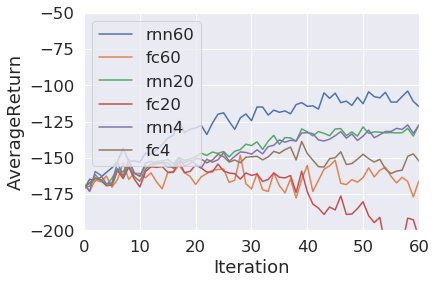

In [165]:
prefix = '/home/rakelly/hw-private/hw5/meta/data/'
# if not otherwise indicated, gamma == 0.9
logdir = [
          #'{}FINAL-pm-ppo-rnn-randtask-hist60-square_pm_07-11-2018_11-04-53', # rnn hist 60 (lr=5e-4, gamma=.99)
          #'{}FINAL-pm-ppo-rnn-randtask-hist60-square_pm_07-11-2018_22-43-10', # rnn hist 60 lr=5e-5
          '{}FINAL-pm-ppo-rnn-randtask-hist60-square_pm_07-11-2018_22-43-36', # rnn hist 60 
          #'{}FINAL-pm-ppo-rnn-randtask-hist60-square_pm_07-11-2018_23-07-37', # rnn hist 60 gamma=0.8
          '{}FINAL-pm-ppo-fc-randtask-hist60-square_pm_11-11-2018_14-33-56', # fc hist 60 
          '{}FINAL-pm-ppo-rnn-randtask-hist20-square_pm_11-11-2018_14-35-45', # rnn hist 20
          '{}FINAL-pm-ppo-fc-randtask-hist20-square_pm_11-11-2018_14-35-26', # fc hist 20
          '{}FINAL-pm-ppo-rnn-randtask-hist4-square_pm_11-11-2018_14-36-34', # rnn hist 4
          '{}FINAL-pm-ppo-fc-randtask-hist4-square_pm_11-11-2018_14-38-33', # fc hist 4
         ]
#logdir = logdir[-1:]
logdir = [l.format(prefix) for l in logdir]
print(logdir)
#stat = 'FinalReward'
stat = 'AverageReturn'
plot(logdir, ['rnn60', 'fc60', 'rnn20', 'fc20', 'rnn4', 'fc4'], stat)